In [68]:
import requests, json
from collections import OrderedDict
from operator import getitem
import time
import pandas as pd
from web3 import Web3
import warnings
import struct
import binascii
import time
import math

In [72]:
etherfi_contract = Web3.to_checksum_address('0x308861A430be4cce5502d0A12724771Fc6DaF216')
deposit_event = '0xa241faf62e66ce518d1934ce4c936d806a02289ba483fac23beb8c15755be90d'
api_key = 'API_KEY'

In [73]:
headers = {
    "accept": "application/json",
    "x-amberdata-blockchain-id": "ethereum-mainnet",
    "x-api-key": f'{api_key}'
}

In [74]:
#Empyt dict for storing returned data. 
collection = {}
id = 0
#For Pagination
pagination = 0
total_pages = 300 #Adjust number of pages required. 
paginationIncrement = 1

In [75]:
# Start the timer
start_time = time.time()
while pagination <= total_pages:
    #Fetch Contract Events Logs. 
    url = f'https://web3api.io/api/v2/addresses/{etherfi_contract}/logs?topic={deposit_event}&page={pagination}&size=100'
    response = requests.request("GET", url, headers=headers)
    while response.status_code == 429:
        time.sleep(1)
        response = requests.request("GET", url, params=querystring)
    batch_list = json.loads(response.text)["payload"]['records']
    for item in batch_list:
            try: 
                id +=1
                collection[id] = {}
                collection[id]['timestamp'] = item["timestamp"]
                collection[id]['transaction_hash'] = item["transactionHash"]
                collection[id]['block_number'] = item['blockNumber']
                collection[id]['deposit_amount'] = float.fromhex(item['data'][0]) / math.pow(10,18)

            except NameError:
                print(NameError)
            except:
                print("No Data")
    print('Finished page',pagination)
    pagination += paginationIncrement

# End the timer
end_time = time.time()

# Calculate the duration
duration = end_time - start_time
print(f"Total time taken: {duration} seconds")


Finished page 0
Finished page 1
Finished page 2
Finished page 3
Finished page 4
Finished page 5
Finished page 6
Finished page 7
Finished page 8
Finished page 9
Finished page 10
Finished page 11
Finished page 12
Finished page 13
Finished page 14
Finished page 15
Finished page 16


KeyboardInterrupt: 

In [58]:
#updating some pandas default settings
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols 
pd.set_option('display.float_format', lambda x: f'{x:.3f}') # Format number

In [59]:
df = pd.DataFrame.from_dict(collection,orient='index')

In [60]:
df

,timestamp,transaction_hash,block_number,deposit_amount
1,1718117627000,0x4186fc57313b29b7f8109af0e1bec8b9240f8cd85754c54dd05554e4de0dabaf,20069310,0.010
2,1718117579000,0x4fd530f2b996ada2e2f8441258a084aaf3de8e9ac9335204d6b93a2e245393cf,20069306,384.000
3,1718117411000,0xe7a0bfda595cfdb189a7e95baa12bd1445653f86443551e949cc856bd055bf7e,20069292,0.010
4,1718117027000,0x50f452f54496a51f85cbf0308f8b7777d562dfe7c559175f886b02cec02827b5,20069260,0.045
5,1718116823000,0x3e5c7f7f38e1571aea5457b8aeda7d7aa476e64153b0911ad59ed300f6a77073,20069243,0.520
...,...,...,...,...
30096,1714945763000,0x524cb663189159bc127046d194c90b3dd5c503ab31bab2355b3dd1a86ae9909a,19806677,0.013
30097,1714945679000,0x4fe87a1d2fb22a2116f8be9931260ca5eed4a51053c66df538097b22ef86d76c,19806670,0.521
30098,1714945679000,0xb6b777fb35fc9540d1af6926c500607e6c01d40cd0d61ec437192862a4a2e75a,19806670,0.127
30099,1714945607000,0x8a15db775e1c8a900aa5c5a9081640fa8186601ddb86333b0f862f72d1c64122,19806664,0.200


In [61]:
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

In [62]:
# Group by day and sum the deposit amounts
df['date'] = df['datetime'].dt.date
daily_deposits = df.groupby('date')['deposit_amount'].sum()

In [53]:
import matplotlib.pyplot as plt

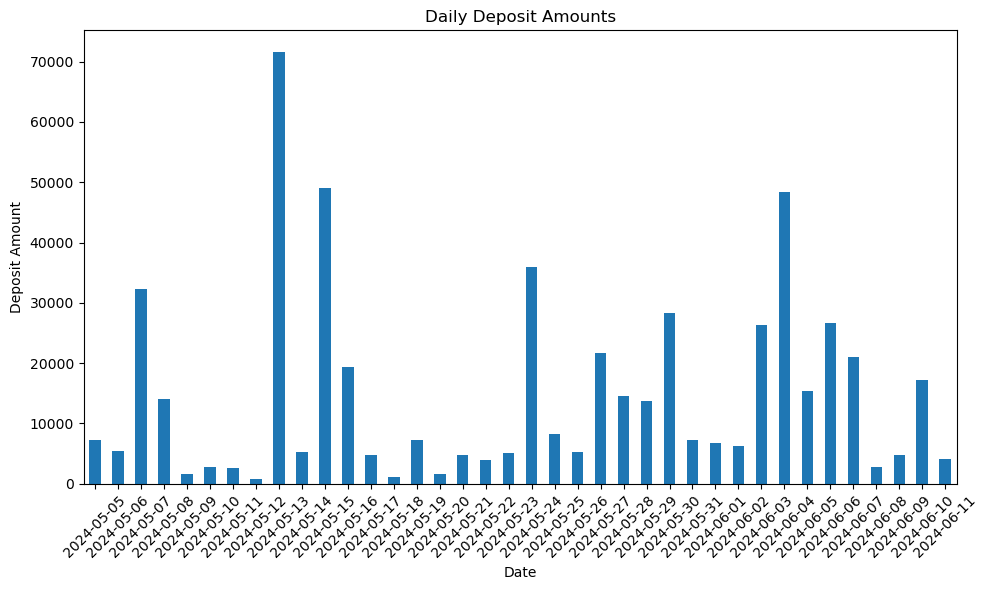

In [63]:
# Plotting
plt.figure(figsize=(10, 6))
daily_deposits.plot(kind='bar')
plt.xlabel('Date')
plt.ylabel('Deposit Amount')
plt.title('Daily Deposit Amounts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()